In [8]:
import time
from copy import deepcopy

import IPython.display as IPd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

import stg_energy.fig2_histograms.viz as viz
from pyloric import simulate
from stg_energy.common import col, svg
import pandas as pd

# Figure 2

In [14]:
pd.options.display.max_columns=999

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
PANEL_A = "../svg/panel_a.svg"
PANEL_B = "../svg/panel_b.svg"
PANEL_C1 = "../svg/panel_c1.svg"
PANEL_C2 = "../svg/panel_c2.svg"
PANEL_D1 = "../svg/panel_d1.svg"
PANEL_D2 = "../svg/panel_d2.svg"

PANEL_C1_supp = "../svg/panel_c1_supp.svg"
PANEL_C2_supp = "../svg/panel_c2_supp.svg"
PANEL_D1_supp = "../svg/panel_d1_supp.svg"
PANEL_D2_supp = "../svg/panel_d2_supp.svg"

In [85]:
theta = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_circuit_parameters.pkl")
x = pd.read_pickle("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_simulation_outputs.pkl")
seeds = np.load("../../../results/simulation_data_Tube_MLslurm_cluster/close_to_xo_seeds.npy")

theta_np = theta.to_numpy()
x_np = x.to_numpy()

# Panel A: Histogram for total energy

In [86]:
all_energies_per_spike = x["energies_per_spike"].to_numpy()
all_total_energies = x["energies"].to_numpy()

In [87]:
summed_energies_per_spike = np.sum(np.asarray(all_energies_per_spike), axis=1)
summed_energies_total = np.sum(np.asarray(all_total_energies), axis=1)

In [88]:
summed_energies_total

array([142889.73118529, 154686.78826598, 129325.24806029, ...,
       163975.93039683, 133531.64588166, 227250.81305192])

In [89]:
129325. * 0.628e-3

81.2161

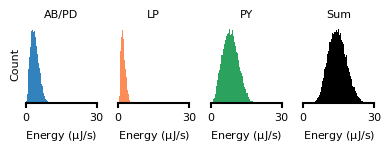

In [90]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 4, figsize=(4.5, 1))

    # / 10 because of 10 seconds simulation_time. /1000 to go from nJ to muJ
    _ = ax[0].hist(
        all_total_energies[:, 0]/10/1000, range=[0, 30], bins=100, color="#3182bd"
    )
    ax[0].set_ylabel("Count")
    ax[0].tick_params(axis="both", which="major")
    ax[0].spines["top"].set_visible(False)
    ax[0].spines["right"].set_visible(False)
    ax[0].spines["left"].set_visible(False)
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_total_energies[:, 1]/10/1000, range=[0, 30], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].tick_params(axis="both", which="major")
    ax[1].spines["top"].set_visible(False)
    ax[1].spines["right"].set_visible(False)
    ax[1].spines["left"].set_visible(False)
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(
        all_total_energies[:, 2]/10/1000, range=[0, 30], bins=100, color="#2ca25f"
    )
    # ax[2].set_ylabel('Count')
    ax[2].tick_params(axis="both", which="major")
    ax[2].spines["top"].set_visible(False)
    ax[2].spines["right"].set_visible(False)
    ax[2].spines["left"].set_visible(False)
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    _ = ax[3].hist(summed_energies_total/10/1000, range=[0, 30], bins=100, color="k")
    # ax[3].set_ylabel('Count')
    ax[3].tick_params(axis="both", which="major")
    ax[3].spines["top"].set_visible(False)
    ax[3].spines["right"].set_visible(False)
    ax[3].spines["left"].set_visible(False)
    ax[3].axes.get_yaxis().set_ticks([])
    ax[3].set_title("Sum")

    plt.subplots_adjust(wspace=0.3)

    for i in range(4):
        ax[i].set_xlim([0, 30])
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)
        ax[i].set_xlabel("Energy ($\mu$J/s)")
        ax[i].set_xticks([0, 30])

    plt.savefig(PANEL_A, facecolor="None", transparent=True)
    plt.show()

# Panel B: Histogram for energy per spike

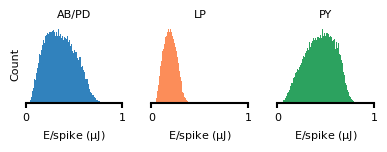

In [91]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(4.5, 1))

    # The factor /4000 comes from: 10 second recording. 0.025ms stepsize -> total energy = int_energy = energy * 0.025ms = energy / 40000
    _ = ax[0].hist(all_energies_per_spike[:, 0] / 1000, range=[0, 1], bins=100, color="#3182bd")
    ax[0].set_ylabel("Count")
    ax[0].axes.get_yaxis().set_ticks([])
    ax[0].set_title("AB/PD")

    _ = ax[1].hist(
        all_energies_per_spike[:, 1] / 1000, range=[0, 1], bins=100, color="#fc8d59"
    )
    # ax[1].set_ylabel('Count')
    ax[1].set_xlabel("E/spike")
    ax[1].axes.get_yaxis().set_ticks([])
    ax[1].set_title("LP")

    _ = ax[2].hist(all_energies_per_spike[:, 2] / 1000, range=[0, 1], bins=100, color="#2ca25f")
    # ax[2].set_ylabel('Count')
    ax[2].set_xlabel("E/spike")d
    ax[2].axes.get_yaxis().set_ticks([])
    ax[2].set_title("PY")

    for i in range(3):
        ax[i].set_xlim([0, 1])
        ax[i].set_xticks([0, 1])
        ax[i].set_xlabel("E/spike ($\mu$J)")
        ax[i].spines["top"].set_visible(False)
        ax[i].spines["right"].set_visible(False)
        ax[i].spines["left"].set_visible(False)

    plt.subplots_adjust(wspace=0.3)

#     plt.savefig(PANEL_B, facecolor="None", transparent=True)
    plt.show()

# Panel C: trace with highest and lowest energy

In [162]:
inds = np.argsort(summed_energies_total)
sorted_params = theta_np[inds]
sorted_seeds = seeds[inds]
sorted_params_pd = pd.DataFrame(sorted_params, columns=theta.columns)

In [163]:
all_out_targets = []

for counter in [0, len(sorted_params) - 1]:
    out_target = simulate(
        sorted_params_pd.loc[counter], seed=int(sorted_seeds[counter]), track_currents=True, track_energy=True
    )
    all_out_targets.append(out_target)

In [164]:
time_vec = np.arange(0, 11000, 0.025)

Showing :   3.0 seconds
Scalebar indicates:  50mV


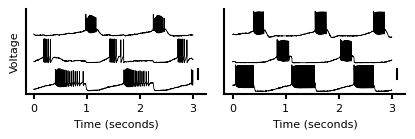

In [165]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.compare_voltage_low_and_high_energy_trace(
        all_out_targets,
        time_vec,
        figsize=(4.9, 1.1),
    )
    plt.savefig(PANEL_C1, facecolor='None', transparent=True)
    plt.show()

Showing :   3.0 seconds
Scalebar indicates:  100 micro Joule / second


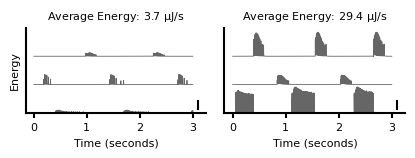

In [166]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.compare_energy_low_and_high_energy_trace(
        all_out_targets,
        t=time_vec,
        figsize=(4.9, 1.1),
    )
    plt.savefig(PANEL_C2, facecolor='None', transparent=True)
    plt.show()

# Panel D: Energy scape

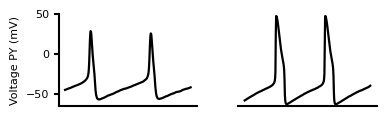

In [167]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.energy_scape_voltage(
        all_out_targets,
        time_vec,
        figsize=(4.1, 1.2),
        cols=['k', 'k', 'k'],
    )
    plt.savefig(PANEL_D1, facecolor="None", transparent=True)
    plt.show()

time_len 1800


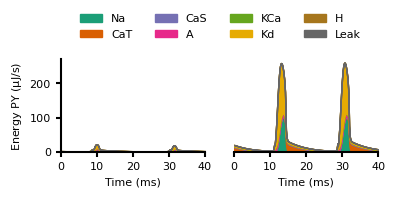

In [168]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    viz.energy_scape_energy(
        all_out_targets,
        time_vec,
        figsize=(4.1, 1.2),
    )
    plt.savefig(PANEL_D2, facecolor="None", transparent=True)
    plt.show()

# Assemble figure

In [169]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [170]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("20.3cm", "11.4cm",

    Panel(
          SVG(PANEL_C1).scale(svg_scale).move(0*factor_svg,0*factor_svg),
          Text("a", 0.0*factor_svg, 2.6*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 0*factor_svg),

    Panel(
          SVG(PANEL_C2).scale(svg_scale).move(0*factor_svg,0*factor_svg),
    ).move(0*factor_svg, 26.6*factor_svg),

    Panel(
          SVG(PANEL_D1).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("b", -2*factor_svg, 2.6*factor_svg, **kwargs_text),
    ).move(73*factor_svg, 0.0*factor_svg),

    Panel(
          SVG(PANEL_D2).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
    ).move(72.1*factor_svg, 20.0*factor_svg),

    Panel(
          SVG(PANEL_A).scale(svg_scale).move(0, 0*factor_svg),
          Text("c", 0.0*factor_svg, 2.5*factor_svg, **kwargs_text),
    ).move(0*factor_svg, 55.0*factor_svg),

    Panel(
        SVG(PANEL_B).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
        Text("d", -2.0*factor_svg, 2.5*factor_svg, **kwargs_text),
    ).move(73*factor_svg, 55.0*factor_svg),
)

!mkdir -p fig
f.save("../fig/fig2.svg")
svg('../fig/fig2.svg')